<a href="https://colab.research.google.com/github/rimgosu/ColabBackup/blob/master/ex04_%EA%B0%9C_%EA%B3%A0%EC%96%91%EC%9D%B4_%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import os

# /content/drive/MyDrive/Colab Notebooks/DeepLearning(Spring)/data/dogs_vs_cats_small
train_dir = '/content/drive/MyDrive/Colab Notebooks/DeepLearning(Spring)/data/dogs_vs_cats_small/train'
valid_dir = '/content/drive/MyDrive/Colab Notebooks/DeepLearning(Spring)/data/dogs_vs_cats_small/validation'

In [2]:
# 하나의 변수에 이미지 파일 전부다 합치기
# 픽셀값 변경 (0~255 / 정수) > (0~1 / 실수) : 정규화
## 1. 숫자 크기 줄이기 > 연산량 감소
## 2. 분산 줄이기 > 연산의 오류 줄어듦
# 이미지 크기 맞춰주기 (150, 150)
# 라벨링
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# 픽셀값 변경하기
## 프로그래밍에서 연산상에서 타입이 변경되도록 하기 (묵시적 형변환 int => float)
generator = ImageDataGenerator(rescale= 1./255)



In [4]:
# 하나의 변수에 이미지 파일 전부 다 합치기
# 이미지 크기 동일하게 만들어주지
# 라벨링
train_generator = generator.flow_from_directory(
    directory = train_dir,
    target_size = (150,150), # 변환할 이미지의 크기
    batch_size = 100, # 한 번에 변환할 이미지 갯수
    class_mode = 'binary' # 라벨링 방법, 다중분류 : categorical
)

Found 2000 images belonging to 2 classes.


In [5]:
# 하나의 변수에 이미지 파일 전부 다 합치기
# 이미지 크기 동일하게 만들어주지
# 라벨링
valid_generator = generator.flow_from_directory(
    directory = valid_dir,
    target_size = (150,150), # 변환할 이미지의 크기
    batch_size = 100, # 한 번에 변환할 이미지 갯수
    class_mode = 'binary' # 라벨링 방법, 다중분류 : categorical
)

Found 1000 images belonging to 2 classes.


In [6]:
# CNN 모델 설계
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [7]:
model1 = Sequential()

model1.add(Conv2D(
    filters = 32,
    kernel_size = (3,3),
    input_shape = (150,150,3),
    activation = 'relu'
))

model1.add(MaxPool2D(
    pool_size= (2,2)
))

model1.add(Conv2D(
    filters = 32,
    kernel_size = (3,3),
    activation = 'relu'
))

model1.add(MaxPool2D(
    pool_size= (2,2)
))

In [8]:
model1.add(Flatten())
model1.add(Dense(units = 32, activation = 'relu'))
model1.add(Dense(units= 1, activation = 'sigmoid'))

In [9]:
model1.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [10]:
model1.fit(
    train_generator,
    epochs = 20,
    validation_data = valid_generator
)

Epoch 1/20
20/20 [==============================] - 518s 26s/step - loss: 0.7578 - accuracy: 0.5070 - val_loss: 0.6889 - val_accuracy: 0.5050
Epoch 2/20
20/20 [==============================] - 9s 479ms/step - loss: 0.6778 - accuracy: 0.5460 - val_loss: 0.6705 - val_accuracy: 0.5110
Epoch 3/20
20/20 [==============================] - 11s 552ms/step - loss: 0.6430 - accuracy: 0.6255 - val_loss: 0.6471 - val_accuracy: 0.6390
Epoch 4/20
20/20 [==============================] - 8s 424ms/step - loss: 0.5895 - accuracy: 0.6830 - val_loss: 0.6265 - val_accuracy: 0.6070
Epoch 5/20
20/20 [==============================] - 9s 474ms/step - loss: 0.5258 - accuracy: 0.7500 - val_loss: 0.6089 - val_accuracy: 0.6760
Epoch 6/20
20/20 [==============================] - 9s 461ms/step - loss: 0.4485 - accuracy: 0.7900 - val_loss: 0.5947 - val_accuracy: 0.6910
Epoch 7/20
20/20 [==============================] - 9s 451ms/step - loss: 0.3661 - accuracy: 0.8385 - val_loss: 0.6176 - val_accuracy: 0.7020
Epoch

In [11]:
import PIL.Image as pimg
import cv2
# 이미지 불러오기
pre_img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/DeepLearning(Spring)/data/스크린샷 2023-09-27 150622.png',cv2.IMREAD_COLOR)
# 이미지 색상 변경하기
pre_img = cv2.cvtColor(pre_img, cv2.COLOR_BGR2RGB)
# 이미지 크기 변경하기
pre_img = cv2.resize(pre_img,(150,150))
# 이미지 차원 변경하기
pre_img = pre_img.reshape((1,150,150,3))

In [12]:
# 0 = cat, 1 = dog
model1.predict(pre_img)

# 결과 : 0 = 6, 1 = 17
# 대다수의 사람이 개라는 결과를 얻는다 = 모델 학습이 덜되서
# 개의 규칙은 잘 찾았지만 고양이의 규칙은 잘 찾지 못했기 때문

1/1 [==============================] - 0s 167ms/step


array([[1.]], dtype=float32)

In [13]:
# train accuracy : 0.98
# val accuracy : 0.7
# > train은 학습이 잘 됐고, val은 학습이 안됐다 => 과대적합에 걸렸다.
# 과대적합을 해소하는 방법
# 1. 데이터의 양을 늘린다.(추가적으로 데이터를 수집) > 많이 어렵다
# 2. 모델을 더 깊게 구성한다 (층을 더 많이 쌓는다)
# 3. 데이터를 확장한다.(가지고 있는 데이터를 다양하게 표현)


In [14]:
# 데이터를 확장을 하고 새롭게 학습한다
# 데이터를 확장하면 원본 데이터는 사라진다
# 모델 설계 => 확장 안된 이미지로 학습 => 결과 확인 => 만족스럽지 않다 => 데이터 확장 후 학습

In [15]:
# 기존 모델에 확장 데이터로 학습하기
aug_generator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [16]:
train_aug_generator = aug_generator.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 100,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.


In [17]:
model1.fit(
    train_aug_generator,
    epochs=20,
    validation_data = valid_generator
)

Epoch 1/20
20/20 [==============================] - 20s 1s/step - loss: 0.7857 - accuracy: 0.6615 - val_loss: 0.6358 - val_accuracy: 0.6390
Epoch 2/20
20/20 [==============================] - 22s 1s/step - loss: 0.6202 - accuracy: 0.6555 - val_loss: 0.6080 - val_accuracy: 0.6660
Epoch 3/20
20/20 [==============================] - 19s 981ms/step - loss: 0.6064 - accuracy: 0.6680 - val_loss: 0.6060 - val_accuracy: 0.6680
Epoch 4/20
20/20 [==============================] - 20s 1s/step - loss: 0.5791 - accuracy: 0.7015 - val_loss: 0.5598 - val_accuracy: 0.7100
Epoch 5/20
20/20 [==============================] - 20s 988ms/step - loss: 0.5860 - accuracy: 0.6890 - val_loss: 0.6253 - val_accuracy: 0.6700
Epoch 6/20
20/20 [==============================] - 20s 991ms/step - loss: 0.5999 - accuracy: 0.6815 - val_loss: 0.5922 - val_accuracy: 0.6930
Epoch 7/20
20/20 [==============================] - 20s 992ms/step - loss: 0.5772 - accuracy: 0.6875 - val_loss: 0.5778 - val_accuracy: 0.6990
Epoch 8/

# 언어지능 시작

# 과대적합을 줄이는  방법들
- 증식
  - 장점 : 간단
  - 단점 : 가짜는 가짜다. (급격한 성능 향상은 없다)
  - epoch 수는 증가시켜주어야한다.
- dropout()
  - 층에 사용하는 퍼셉트론의 수를 설정한 비율만큼 사용하지 않는 방법
  - epoch마다 사용하지 않는 퍼셉트론은 랜덤
- BatchNormalization() : 정규화
  - CNN층 = Conv (특성추출) + Maxpooling (크기 축소)
  - Conv층의 파라미터를 정규화(평균 0, 분산 1) <br>
  => 음수가 발생 <br>
  => relu를 적용하면 <br>
  => 음수가 사라지는 문제 => leaky relu
- GlobalAveragePooling2D()
  - CNN에서 가장 문제가 되는 층 : Maxpooling 층 <br>
  => CNN 속도의 60% 이상을 차지 (느리다)
  - Maxpooling2D+ Flatten()
  - Dense 층과 연결되는 층에 사용
  

- Data Generator : 학습 시킬 때 한 번에 전체 데이터를 가져오는 것이 아니라 batch_size만큼씩만 가져와서 처리하도록 하는것 (메모리 자원 부족을 해결)

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

generator = ImageDataGenerator(rescale=1./255)

train_generator = generator.flow_from_directory(
    directory = train_dir,
    target_size = (150,150), # 변환할 이미지의 크기
    batch_size = 100, # 한 번에 변환할 이미지 갯수
    class_mode = 'binary' # 라벨링 방법, 다중분류 : categorical
)
valid_generator = generator.flow_from_directory(
    directory = valid_dir,
    target_size = (150,150), # 변환할 이미지의 크기
    batch_size = 100, # 한 번에 변환할 이미지 갯수
    class_mode = 'binary' # 라벨링 방법, 다중분류 : categorical
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [21]:
# 라벨은 알파벳 순
train_generator.class_indices, valid_generator.class_indices

({'cats': 0, 'dogs': 1}, {'cats': 0, 'dogs': 1})

# 신경망 설계  

In [34]:
# CNN 모델 설계
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization, GlobalAveragePooling2D

In [35]:
model1 = Sequential()

model1.add(Conv2D(
    filters = 32,
    kernel_size = (3,3),
    input_shape = (150,150,3),
    activation = 'relu'
))

model1.add(MaxPool2D(
    pool_size= (2,2)
))

model1.add(Conv2D(
    filters = 32,
    kernel_size = (3,3),
    activation = 'relu'
))

model1.add(MaxPool2D(
    pool_size= (2,2)
))

In [36]:
model1.add(Flatten())

model1.add(Dropout(0.5))

model1.add(Dense(units = 32, activation = 'relu'))
model1.add(Dense(units= 1, activation = 'sigmoid'))

In [31]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 41472)             0         
                                                                 
 dense_6 (Dense)             (None, 32)               

In [37]:
model1.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [38]:
model1.fit(
    train_generator,
    epochs = 20,
    validation_data = valid_generator
)

Epoch 1/20
20/20 [==============================] - 10s 424ms/step - loss: 0.7835 - accuracy: 0.4970 - val_loss: 0.6932 - val_accuracy: 0.5380
Epoch 2/20
20/20 [==============================] - 9s 460ms/step - loss: 0.6929 - accuracy: 0.5025 - val_loss: 0.6916 - val_accuracy: 0.5190
Epoch 3/20
20/20 [==============================] - 9s 459ms/step - loss: 0.6840 - accuracy: 0.5510 - val_loss: 0.6798 - val_accuracy: 0.5540
Epoch 4/20
20/20 [==============================] - 9s 431ms/step - loss: 0.6552 - accuracy: 0.6320 - val_loss: 0.6704 - val_accuracy: 0.6060
Epoch 5/20
20/20 [==============================] - 9s 463ms/step - loss: 0.5926 - accuracy: 0.7070 - val_loss: 0.6317 - val_accuracy: 0.6420
Epoch 6/20
20/20 [==============================] - 11s 559ms/step - loss: 0.5458 - accuracy: 0.7350 - val_loss: 0.6149 - val_accuracy: 0.6800
Epoch 7/20
20/20 [==============================] - 8s 429ms/step - loss: 0.4701 - accuracy: 0.7795 - val_loss: 0.6109 - val_accuracy: 0.6920
Epoc

- GlobalAveragePooling2D()

In [39]:
model1 = Sequential()

model1.add(Conv2D(
    filters = 32,
    kernel_size = (3,3),
    input_shape = (150,150,3),
    activation = 'relu'
))

model1.add(MaxPool2D(
    pool_size= (2,2)
))

model1.add(Conv2D(
    filters = 32,
    kernel_size = (3,3),
    activation = 'relu'
))

# model1.add(MaxPool2D(
#     pool_size= (2,2)
# ))

# model1.add(Flatten())

model1.add(GlobalAveragePooling2D())

model1.add(Dropout(0.5))

model1.add(Dense(units = 32, activation = 'relu'))
model1.add(Dense(units= 1, activation = 'sigmoid'))

In [40]:
model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 global_average_pooling2d (  (None, 32)                0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 32)               

In [41]:
model1.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [42]:
model1.fit(
    train_generator,
    epochs = 20,
    validation_data = valid_generator
)

Epoch 1/20
20/20 [==============================] - 11s 460ms/step - loss: 0.6945 - accuracy: 0.5020 - val_loss: 0.6916 - val_accuracy: 0.5430
Epoch 2/20
20/20 [==============================] - 9s 458ms/step - loss: 0.6905 - accuracy: 0.5120 - val_loss: 0.6914 - val_accuracy: 0.5000
Epoch 3/20
20/20 [==============================] - 8s 429ms/step - loss: 0.6907 - accuracy: 0.5185 - val_loss: 0.6873 - val_accuracy: 0.4980
Epoch 4/20
20/20 [==============================] - 9s 456ms/step - loss: 0.6866 - accuracy: 0.5325 - val_loss: 0.6859 - val_accuracy: 0.5870
Epoch 5/20
20/20 [==============================] - 11s 561ms/step - loss: 0.6845 - accuracy: 0.5495 - val_loss: 0.6788 - val_accuracy: 0.5890
Epoch 6/20
20/20 [==============================] - 9s 444ms/step - loss: 0.6785 - accuracy: 0.5750 - val_loss: 0.6738 - val_accuracy: 0.5750
Epoch 7/20
20/20 [==============================] - 9s 429ms/step - loss: 0.6736 - accuracy: 0.5700 - val_loss: 0.6797 - val_accuracy: 0.5180
Epoc

In [43]:
model1.fit(
    train_generator,
    epochs = 50,
    validation_data = valid_generator
)

Epoch 1/50
20/20 [==============================] - 11s 576ms/step - loss: 0.6526 - accuracy: 0.6005 - val_loss: 0.6527 - val_accuracy: 0.5950
Epoch 2/50
20/20 [==============================] - 9s 469ms/step - loss: 0.6508 - accuracy: 0.5950 - val_loss: 0.6541 - val_accuracy: 0.5940
Epoch 3/50
20/20 [==============================] - 9s 452ms/step - loss: 0.6541 - accuracy: 0.6005 - val_loss: 0.6436 - val_accuracy: 0.6140
Epoch 4/50
20/20 [==============================] - 9s 459ms/step - loss: 0.6501 - accuracy: 0.6100 - val_loss: 0.6420 - val_accuracy: 0.6120
Epoch 5/50
20/20 [==============================] - 9s 431ms/step - loss: 0.6514 - accuracy: 0.6015 - val_loss: 0.6410 - val_accuracy: 0.6110
Epoch 6/50
20/20 [==============================] - 9s 431ms/step - loss: 0.6529 - accuracy: 0.5995 - val_loss: 0.6430 - val_accuracy: 0.6100
Epoch 7/50
20/20 [==============================] - 9s 465ms/step - loss: 0.6506 - accuracy: 0.5950 - val_loss: 0.6438 - val_accuracy: 0.6080
Epoch

- BatchNormalization()
  - Conv2D()와 Activation() 층 사이에 배치
  - Activation()이 정규화 기능을 일부 수행 => Activation() 다음에 배치하면 효과가 떨어짐
  - 원칙 : C + B + A + M => 근데 일반적으로 : C + A + B + M

In [56]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.layers import Activation
from keras.layers import Activation, LeakyReLU



model1 = Sequential()

model1.add(Conv2D(filters = 32, kernel_size = (3,3),
    input_shape = (150,150,3)))
model1.add(BatchNormalization())

model1.add(MaxPool2D(pool_size = (2,2)))

model1.add(Conv2D(filters = 32, kernel_size = (3,3),
    activation = LeakyReLU(alpha=0.1)))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size = (2,2)))

model1.add(Conv2D(filters = 32, kernel_size = (3,3),
    activation = LeakyReLU(alpha=0.1)))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size = (2,2)))

model1.add(Conv2D(filters = 128, kernel_size = (3,3),
    activation = LeakyReLU(alpha=0.1)))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size = (2,2)))

model1.add(Conv2D(filters = 64, kernel_size = (3,3),
    activation = LeakyReLU(alpha=0.1)))
model1.add(BatchNormalization())
#model1.add(MaxPool2D( pool_size = (2,2)))

#model1.add(Flatten())

model1.add(GlobalAveragePooling2D())

model1.add(Dropout(0.5))
model1.add(Dense(units = 64, activation = LeakyReLU(alpha=0.1)))
model1.add(Dense(units = 128, activation = LeakyReLU(alpha=0.1)))
model1.add(Dense(units = 64, activation = LeakyReLU(alpha=0.1)))
model1.add(Dense(units = 32, activation = LeakyReLU(alpha=0.1)))

model1.add(Dense(units = 1, activation = 'sigmoid'))

model1.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 batch_normalization_17 (Ba  (None, 148, 148, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_33 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 batch_normalization_18 (Ba  (None, 72, 72, 32)        128       
 tchNormalization)                                               
                                                     

In [57]:
model1.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [58]:
model1.fit(
    train_generator,
    epochs = 20,
    validation_data = valid_generator
)

Epoch 1/20
20/20 [==============================] - 14s 463ms/step - loss: 0.6556 - accuracy: 0.6200 - val_loss: 0.7053 - val_accuracy: 0.5000
Epoch 2/20
20/20 [==============================] - 9s 474ms/step - loss: 0.6104 - accuracy: 0.6715 - val_loss: 0.7892 - val_accuracy: 0.5000
Epoch 3/20
20/20 [==============================] - 9s 433ms/step - loss: 0.5766 - accuracy: 0.7015 - val_loss: 0.8603 - val_accuracy: 0.5000
Epoch 4/20
20/20 [==============================] - 9s 474ms/step - loss: 0.5485 - accuracy: 0.7235 - val_loss: 0.9874 - val_accuracy: 0.5000
Epoch 5/20
20/20 [==============================] - 9s 467ms/step - loss: 0.5189 - accuracy: 0.7410 - val_loss: 1.1096 - val_accuracy: 0.5000
Epoch 6/20
20/20 [==============================] - 11s 556ms/step - loss: 0.4889 - accuracy: 0.7705 - val_loss: 1.2605 - val_accuracy: 0.5000
Epoch 7/20
20/20 [==============================] - 9s 436ms/step - loss: 0.4656 - accuracy: 0.7850 - val_loss: 1.1624 - val_accuracy: 0.5000
Epoc

# 전이학습

- 미리 학습된 모델이나 가중치를 가져다 쓰는 방법


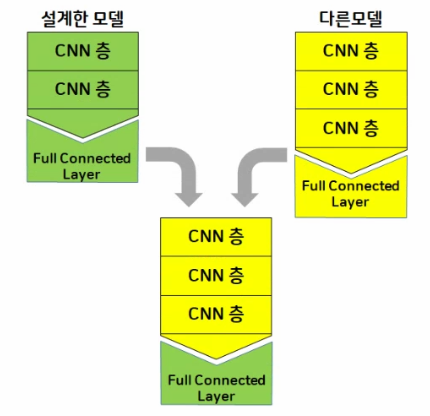

- 전이학습 하는 이유
  - 데이터가 부족
  - 설계한 신경망이 그닥 좋지 못하다

- 전이학습의 종류
  - 특성 추출 : CNN층의 가중치를 그대로 사용
  - 미세 조정 (fine tuning) : CNN층의 가중치를 일부 살짝 변경해서 사용

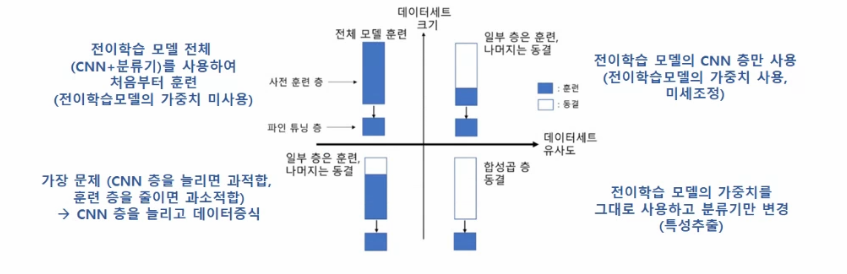